**Task 1: Run the code with given dataset.**

In [ ]:
from google.colab import drive
#drive.mount('/content/MyDrive')
drive.mount("/content/drive", force_remount=True)
%cd /content/drive/My Drive/input/train/
%ls

Mounted at /content/drive
/content/drive/My Drive/input/train
rugby/  soccer/


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np



In [ ]:
labels = ['rugby', 'soccer']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
#Now we can easily fetch our train and validation data.
train = get_data('/content/drive/My Drive/input/train/')
val = get_data('/content/drive/My Drive/input/test')
 

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []
for feature, label in train:
  x_train.append(feature)
  y_train.append(label)
for feature, label in val:
  x_val.append(feature)
  y_val.append(label)
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)
x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [ ]:
history = model.fit(x_train,y_train,epochs = 30 , validation_data = (x_val, y_val))


Epoch 1/30
77/77 [==============================] - 172s 2s/step - loss: 0.6910 - accuracy: 0.5282 - val_loss: 0.6860 - val_accuracy: 0.5590
Epoch 2/30
77/77 [==============================] - 167s 2s/step - loss: 0.6892 - accuracy: 0.5347 - val_loss: 0.6851 - val_accuracy: 0.5295
Epoch 3/30
77/77 [==============================] - 166s 2s/step - loss: 0.6868 - accuracy: 0.5502 - val_loss: 0.6771 - val_accuracy: 0.6213
Epoch 4/30
77/77 [==============================] - 165s 2s/step - loss: 0.6887 - accuracy: 0.5376 - val_loss: 0.6765 - val_accuracy: 0.6082
Epoch 5/30
77/77 [==============================] - 167s 2s/step - loss: 0.6847 - accuracy: 0.5568 - val_loss: 0.6722 - val_accuracy: 0.6426
Epoch 6/30
77/77 [==============================] - 169s 2s/step - loss: 0.6818 - accuracy: 0.5654 - val_loss: 0.6690 - val_accuracy: 0.6623
Epoch 7/30
77/77 [==============================] - 172s 2s/step - loss: 0.6827 - accuracy: 0.5556 - val_loss: 0.6694 - val_accuracy: 0.6213
Epoch 8/30
77

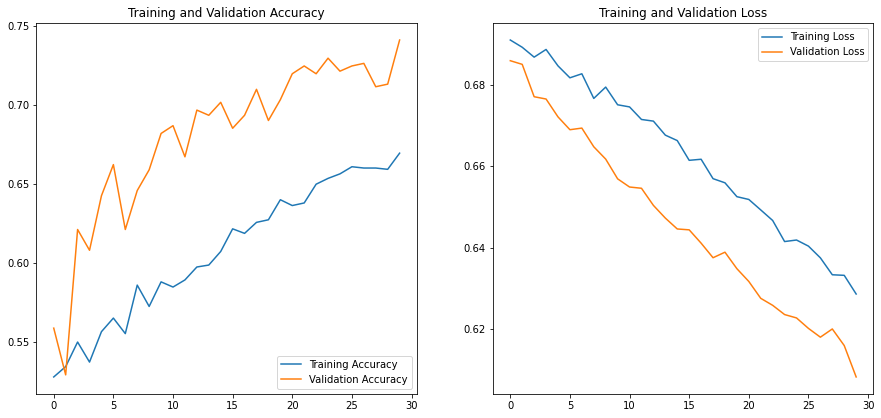

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(30)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#predictions = model.predict_classes(x_val)

predict_x=model.predict(x_val) 
classes_x=np.argmax(predict_x,axis=1)
predictions = classes_x.reshape(1,-1)[0]
print(classification_report(y_val, classes_x, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))


                  precision    recall  f1-score   support

 Rugby (Class 0)       0.73      0.76      0.75       305
Soccer (Class 1)       0.75      0.72      0.74       305

        accuracy                           0.74       610
       macro avg       0.74      0.74      0.74       610
    weighted avg       0.74      0.74      0.74       610





**Task 2: Run the code with different dataset**



In [ ]:
labels = ['chairs', 'sofas']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
#Now we can easily fetch our train and validation data.
train = get_data('/content/drive/My Drive/InputImages/train/')
val = get_data('/content/drive/My Drive/InputImages/test')
 

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [ ]:
history = model.fit(x_train,y_train,epochs = 30 , validation_data = (x_val, y_val))


Epoch 1/30
4/4 [==============================] - 12s 3s/step - loss: 0.6970 - accuracy: 0.4706 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 2/30
4/4 [==============================] - 8s 2s/step - loss: 0.6996 - accuracy: 0.4902 - val_loss: 0.6882 - val_accuracy: 0.5333
Epoch 3/30
4/4 [==============================] - 7s 2s/step - loss: 0.6954 - accuracy: 0.4804 - val_loss: 0.6873 - val_accuracy: 0.6000
Epoch 4/30
4/4 [==============================] - 8s 2s/step - loss: 0.6920 - accuracy: 0.4804 - val_loss: 0.6866 - val_accuracy: 0.5667
Epoch 5/30
4/4 [==============================] - 9s 2s/step - loss: 0.6934 - accuracy: 0.4608 - val_loss: 0.6859 - val_accuracy: 0.6000
Epoch 6/30
4/4 [==============================] - 7s 2s/step - loss: 0.6919 - accuracy: 0.5490 - val_loss: 0.6856 - val_accuracy: 0.6000
Epoch 7/30
4/4 [==============================] - 7s 2s/step - loss: 0.6918 - accuracy: 0.5196 - val_loss: 0.6853 - val_accuracy: 0.6000
Epoch 8/30
4/4 [========================

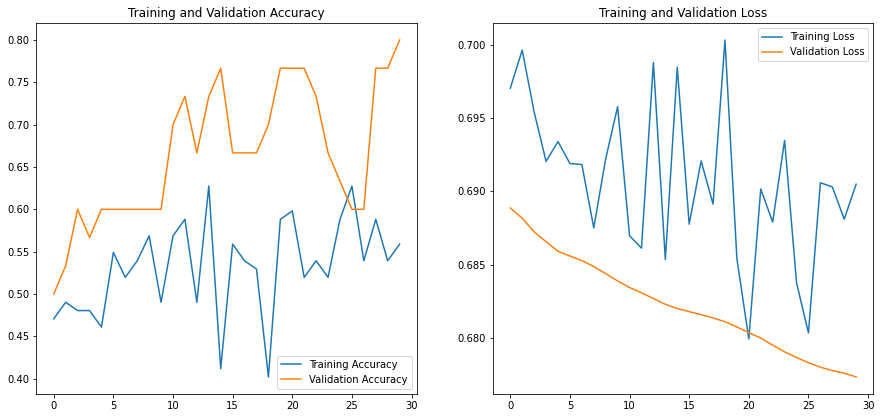

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#predictions = model.predict_classes(x_val)

predict_x=model.predict(x_val) 
classes_x=np.argmax(predict_x,axis=1)

predictions = classes_x.reshape(1,-1)[0]
print(classification_report(y_val, classes_x, target_names = ['chairs (Class 0)','sofas (Class 1)']))


                  precision    recall  f1-score   support

chairs (Class 0)       0.85      0.73      0.79        15
 sofas (Class 1)       0.76      0.87      0.81        15

        accuracy                           0.80        30
       macro avg       0.81      0.80      0.80        30
    weighted avg       0.81      0.80      0.80        30

